Для решения задачи, поставленной в ВКР потребуются опеределенные методы обработки данных из нескольких библиотек. Загрузим их.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_excel
from pandas import DataFrame
from pandas import Series
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from numpy.random import seed
from scipy import stats

In [3]:
#Загрузим датасет без выбросов:
ds = pd.read_excel(r"D:\мгту им Баумана\ВКР_Новикова_Е.Г\Podgot\Podgot.xlsx")
#Посмотрим на первые пять строк таблицы:
ds.head()

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
0,1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
1,3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
2,4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0
3,5,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,60.0
4,6,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,70.0


In [4]:
#Удалим первый неинформативный столбец:
ds.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
# Посмотрим сова на первые 5 строк датасета:
ds.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
1,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
2,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0
3,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,60.0
4,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,70.0


In [6]:
# Посмотрим размер таблицы:
ds.shape

(922, 13)

In [7]:
#Проверим корреляцию между признаками
ds.corr()
# Максимальная корреляция в 0.11 наблюдается между плотностью нашивки и углом нашивки, то есть зависимости между признаками нет. 

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
Соотношение матрица-наполнитель,1.000000,0.007996,0.051643,0.001353,0.021982,-0.010565,0.011910,-0.024316,0.019141,0.076857,-0.032144,0.039924,0.047835
"Плотность, кг/м3",0.007996,1.000000,-0.001416,-0.048938,0.004568,-0.021256,0.061496,-0.015597,-0.079188,-0.009609,-0.052993,-0.048648,0.086460
"модуль упругости, ГПа",0.051643,-0.001416,1.000000,0.044550,-0.001442,0.037622,-0.007805,0.020063,0.031041,0.008368,-0.031490,0.010238,0.078810
"Количество отвердителя, м.%",0.001353,-0.048938,0.044550,1.000000,0.011429,0.070623,0.038762,-0.057026,-0.065711,-0.014827,0.034103,-0.017394,0.007981
"Содержание эпоксидных групп,%_2",0.021982,0.004568,-0.001442,0.011429,1.000000,-0.025315,-0.015844,0.053887,-0.013099,0.010808,0.034520,0.007571,-0.034481
"Температура вспышки, С_2",-0.010565,-0.021256,0.037622,0.070623,-0.025315,1.000000,0.020307,0.014168,-0.017263,0.048142,0.002371,0.034395,-0.015014
"Поверхностная плотность, г/м2",0.011910,0.061496,-0.007805,0.038762,-0.015844,0.020307,1.000000,0.033526,-0.027320,-0.012606,0.053180,0.036931,-0.034989
"Модуль упругости при растяжении, ГПа",-0.024316,-0.015597,0.020063,-0.057026,0.053887,0.014168,0.033526,1.000000,-0.002393,0.051676,0.031910,-0.010193,0.012488
"Прочность при растяжении, МПа",0.019141,-0.079188,0.031041,-0.065711,-0.013099,-0.017263,-0.027320,-0.002393,1.000000,0.016753,0.016144,-0.051580,0.016311
"Потребление смолы, г/м2",0.076857,-0.009609,0.008368,-0.014827,0.010808,0.048142,-0.012606,0.051676,0.016753,1.000000,0.000433,0.009932,0.008012


In [8]:
# Выведем средние и медианные знчения датасета после выбросов и увидим, что медианнное и среднее знчения остались в своих пределах:
mean_and_50 = ds.describe()
mean_and_50.loc[['mean', '50%']]

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
mean,2.927964,1974.118744,736.119982,111.136066,22.200570,286.181128,482.429070,73.303464,2461.491315,218.048059,0.510846,6.931939,57.562887
50%,2.907832,1977.321002,736.178435,111.162090,22.177681,286.220763,457.732246,73.247594,2455.974462,218.697660,1.000000,6.972862,57.584225


In [9]:
#Создадим переменную для нормализации:
ds_norm = ds.copy()

In [10]:
# Посмотрим на типы данных:
ds_norm.reset_index(drop=True).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       922 non-null    float64
 1   Плотность, кг/м3                      922 non-null    float64
 2   модуль упругости, ГПа                 922 non-null    float64
 3   Количество отвердителя, м.%           922 non-null    float64
 4   Содержание эпоксидных групп,%_2       922 non-null    float64
 5   Температура вспышки, С_2              922 non-null    float64
 6   Поверхностная плотность, г/м2         922 non-null    float64
 7   Модуль упругости при растяжении, ГПа  922 non-null    float64
 8   Прочность при растяжении, МПа         922 non-null    float64
 9   Потребление смолы, г/м2               922 non-null    float64
 10  Угол нашивки                          922 non-null    int64  
 11  Шаг нашивки        

In [11]:
#Нормализуем данные с помощью методов fit_transform и MinMaxScaler():
scaler = preprocessing.MinMaxScaler()
col = ds.columns
result = scaler.fit_transform(ds)

ds_minmax_n = pd.DataFrame(result, columns = col)
ds_minmax_n.describe()
# видим, что полученные в результате преобразования данные представлены в диапазоне от 0 до 1

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
count,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000
mean,0.499412,0.502904,0.451341,0.506200,0.490578,0.516739,0.373295,0.487343,0.503776,0.507876,0.510846,0.503426,0.503938
std,0.187858,0.188395,0.201534,0.186876,0.180548,0.190721,0.217269,0.196366,0.188668,0.199418,0.500154,0.183587,0.193933
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.371909,0.368184,0.305188,0.378514,0.366571,0.386228,0.204335,0.353512,0.373447,0.374647,0.000000,0.372844,0.376869
50%,0.495189,0.511396,0.451377,0.506382,0.488852,0.516931,0.354161,0.483718,0.501481,0.510143,1.000000,0.506414,0.504310
75%,0.629774,0.624719,0.587193,0.638735,0.623046,0.646553,0.538397,0.617568,0.624299,0.642511,1.000000,0.626112,0.630842
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


[Text(0, 0, 'Соотношение матрица-наполнитель'),
 Text(1, 0, 'Плотность, кг/м3'),
 Text(2, 0, 'модуль упругости, ГПа'),
 Text(3, 0, 'Количество отвердителя, м.%'),
 Text(4, 0, 'Содержание эпоксидных групп,%_2'),
 Text(5, 0, 'Температура вспышки, С_2'),
 Text(6, 0, 'Поверхностная плотность, г/м2'),
 Text(7, 0, 'Модуль упругости при растяжении, ГПа'),
 Text(8, 0, 'Прочность при растяжении, МПа'),
 Text(9, 0, 'Потребление смолы, г/м2'),
 Text(10, 0, 'Угол нашивки'),
 Text(11, 0, 'Шаг нашивки'),
 Text(12, 0, 'Плотность нашивки')]

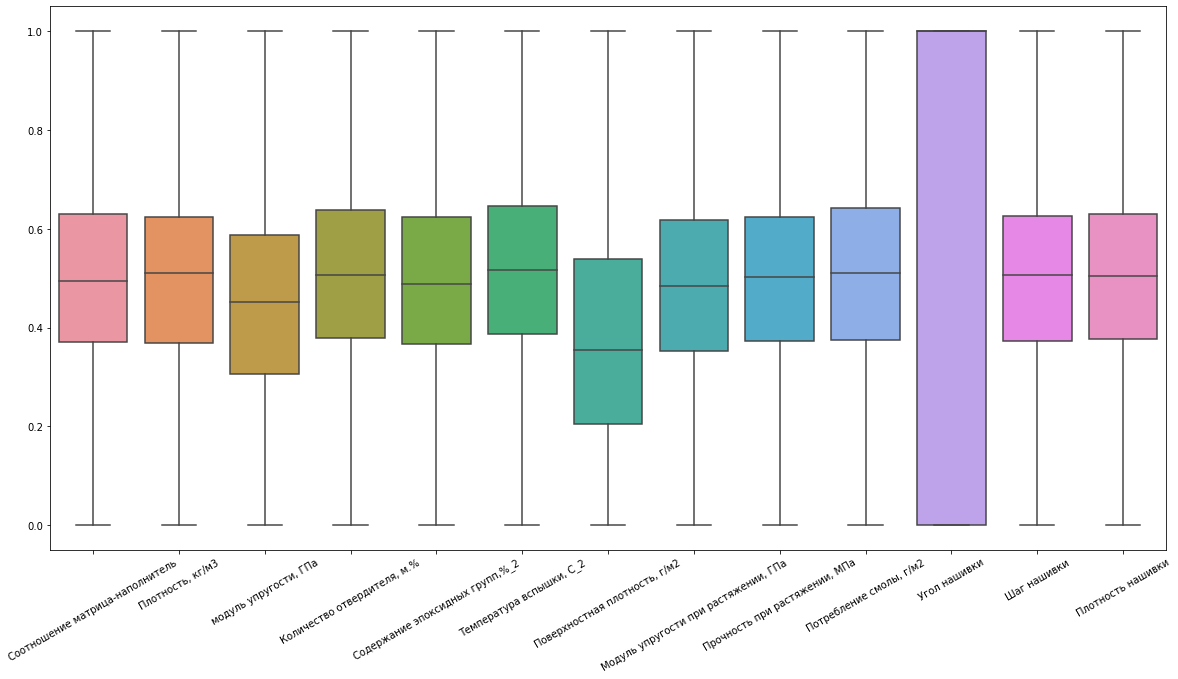

In [12]:
# Построим вертикальный "ящик с усами", чтобы показать распределение данных по характеристикам:
plt.figure(figsize = (20,10))
ax = sns.boxplot(data = ds_minmax_n)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

<AxesSubplot:ylabel='Density'>

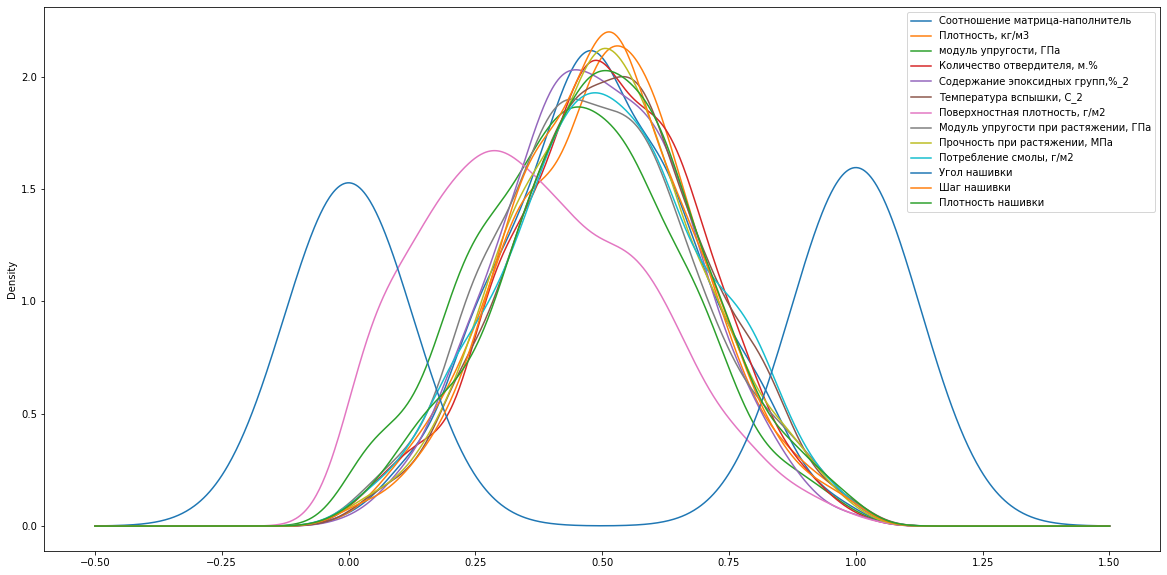

In [13]:
#применим сглаживание ядра для оценки плотности вероятности распределения признаков:
fig, ax = plt.subplots(figsize = (20, 10))
ds_minmax_n.plot(kind = 'kde', ax = ax)

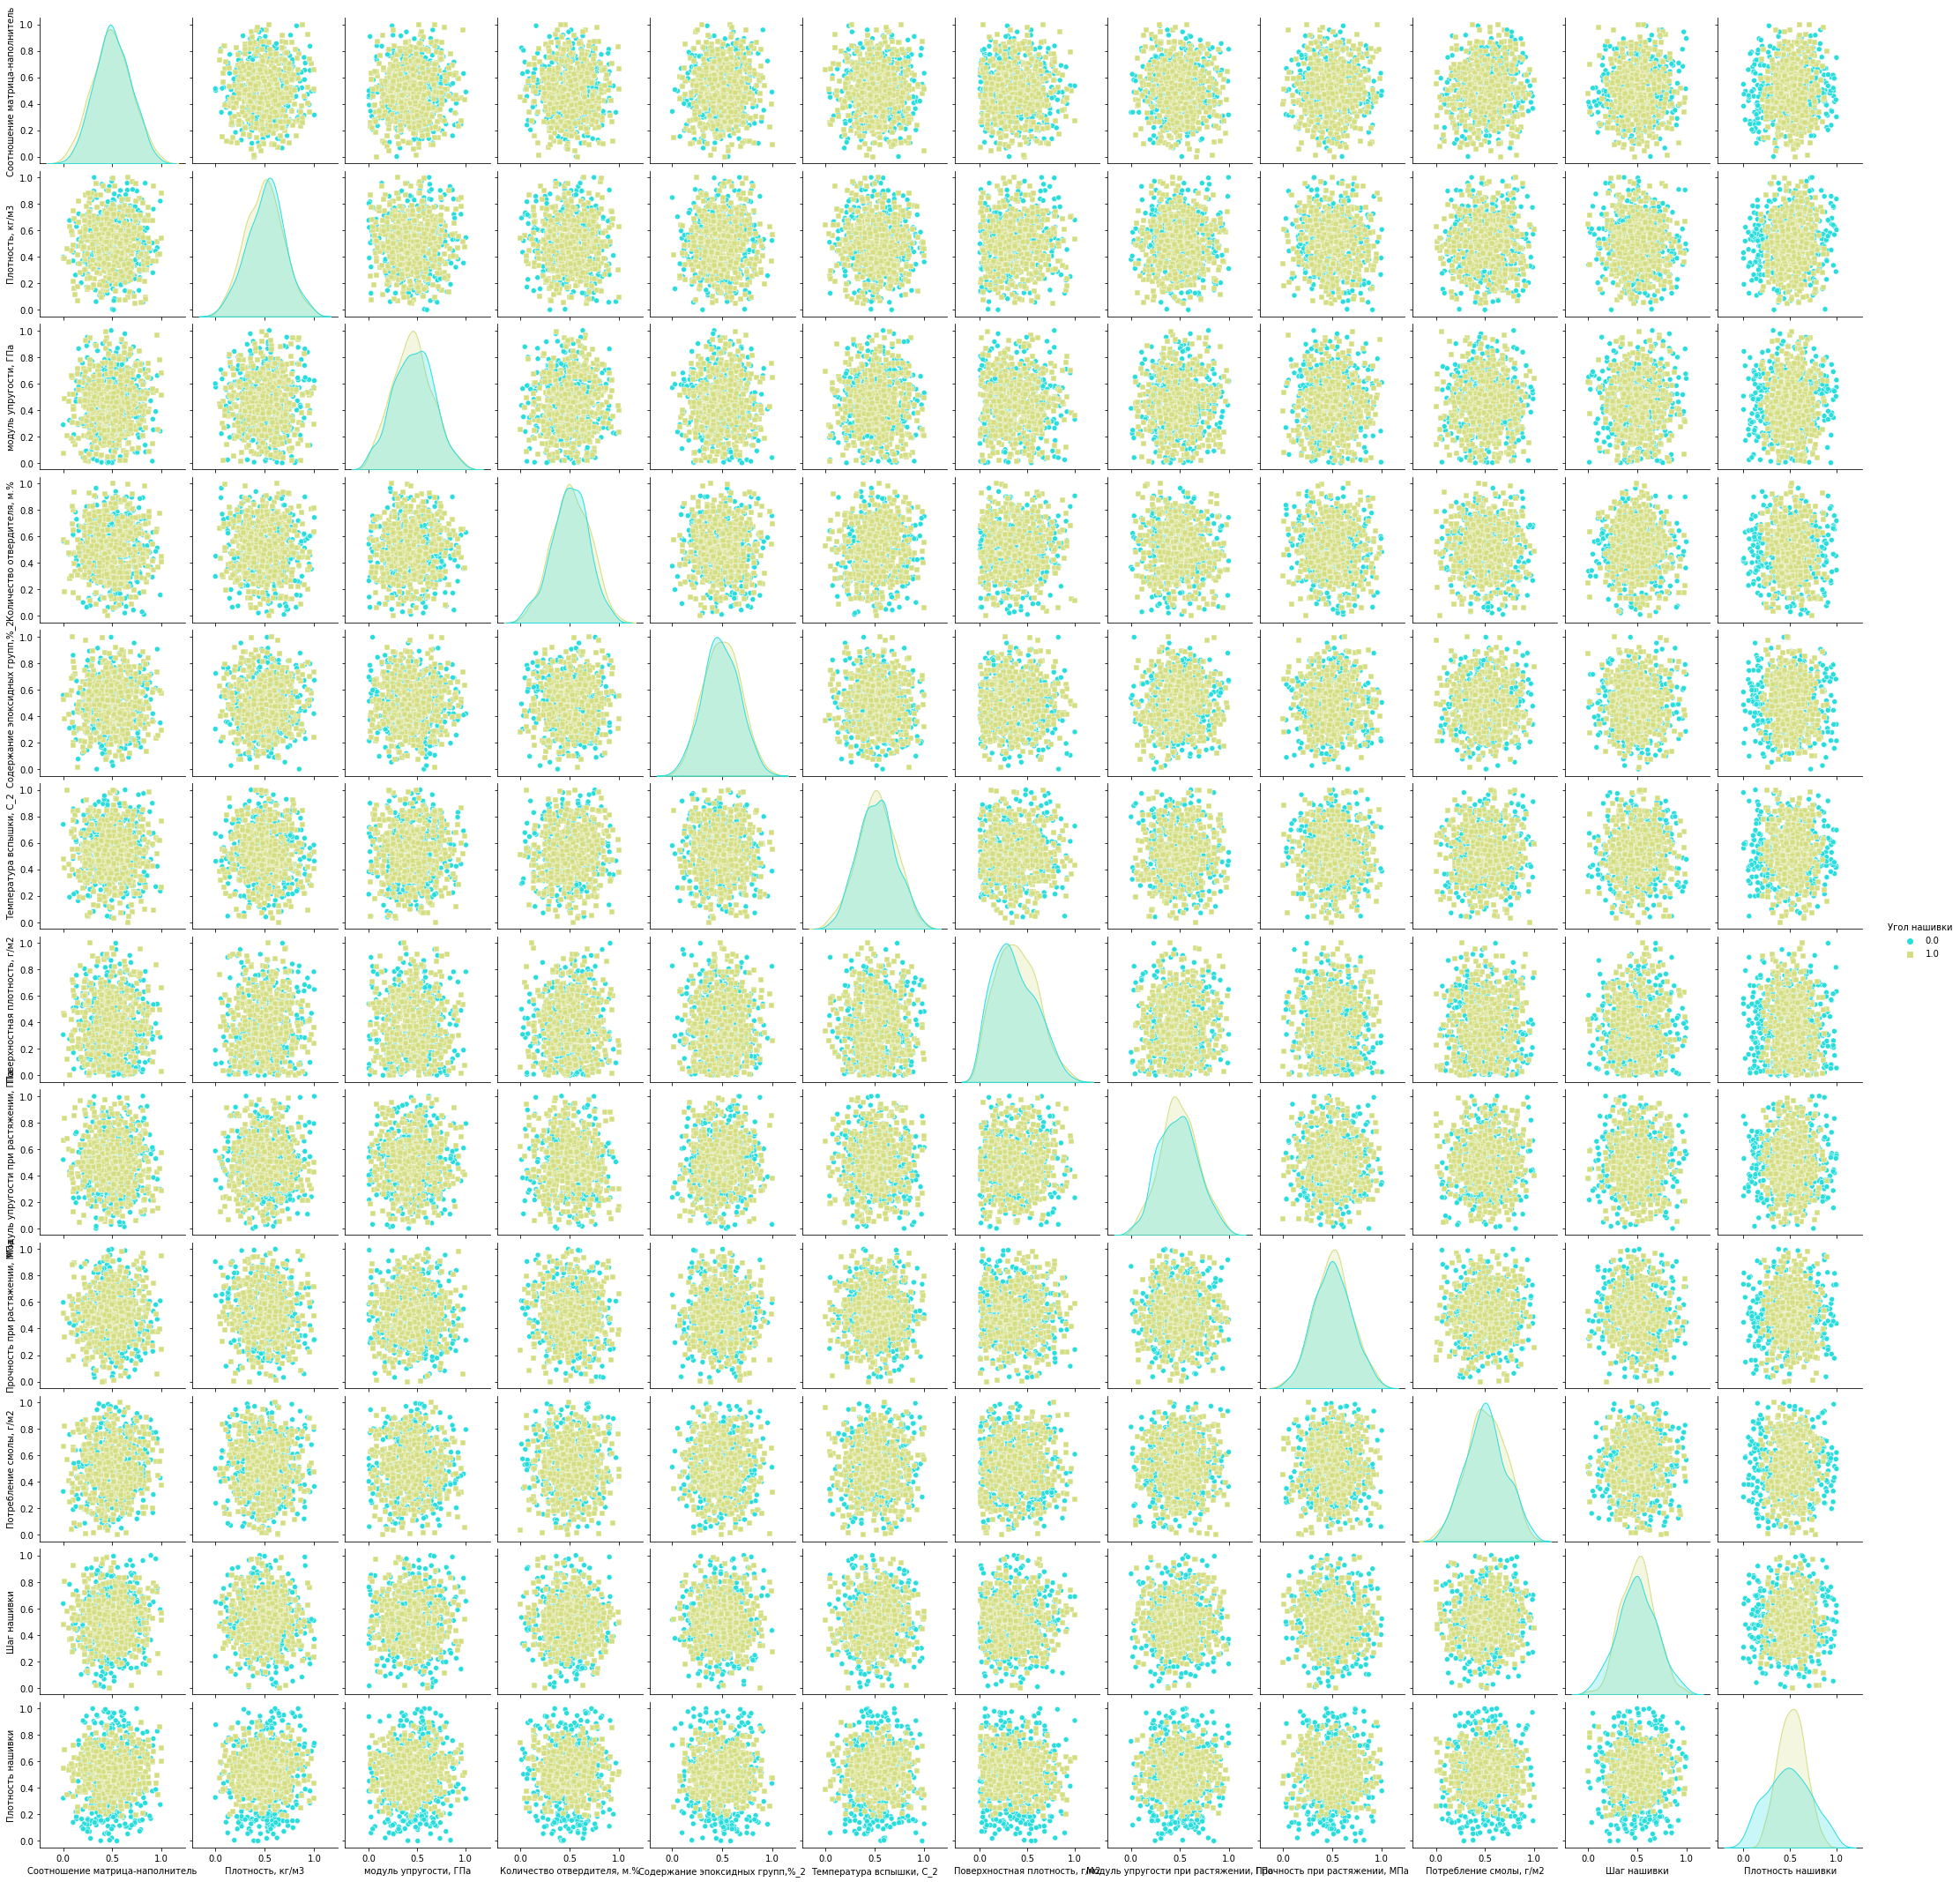

In [14]:
# Построим попарные графики рассеяния точек для наглядной оценки связи между переменными:
sns.pairplot(ds_minmax_n, hue = 'Угол нашивки', markers = ["o", "s"], diag_kind = 'auto', palette = 'rainbow')

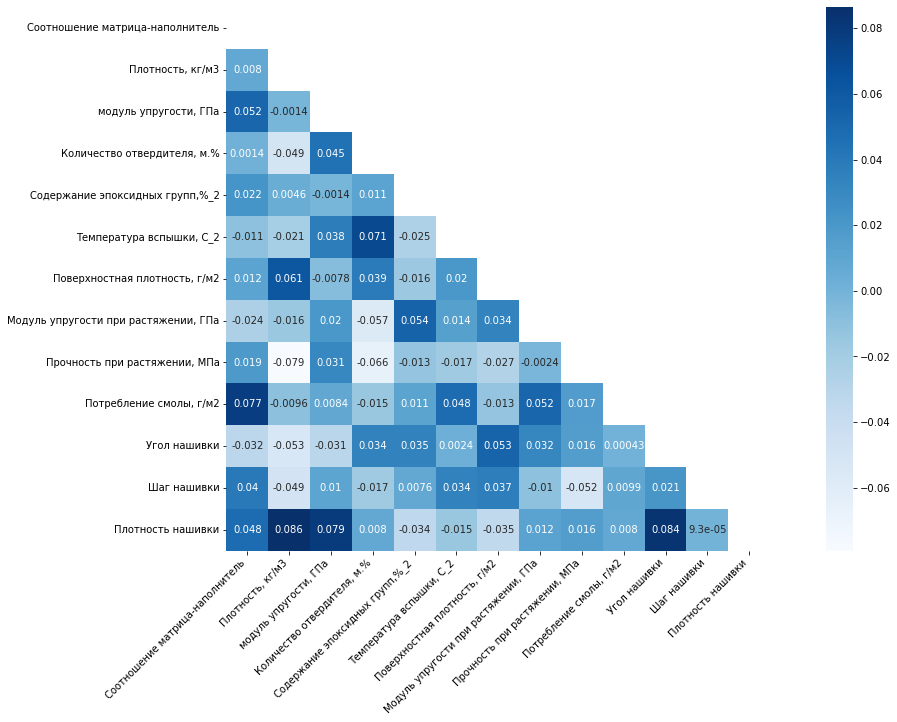

In [15]:
# Нарисуем тепловую карту зависимости между нормализованными значениями признаков:
mask = np.triu(ds_minmax_n.corr())
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(ds_minmax_n.corr(), mask = mask, annot = True, square = True, cmap = 'Blues')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [16]:
# Посмотрим на наличие и силу коррелляции после нормализации:
ds_minmax_n[ds_minmax_n.columns].corr()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
Соотношение матрица-наполнитель,1.000000,0.007996,0.051643,0.001353,0.021982,-0.010565,0.011910,-0.024316,0.019141,0.076857,-0.032144,0.039924,0.047835
"Плотность, кг/м3",0.007996,1.000000,-0.001416,-0.048938,0.004568,-0.021256,0.061496,-0.015597,-0.079188,-0.009609,-0.052993,-0.048648,0.086460
"модуль упругости, ГПа",0.051643,-0.001416,1.000000,0.044550,-0.001442,0.037622,-0.007805,0.020063,0.031041,0.008368,-0.031490,0.010238,0.078810
"Количество отвердителя, м.%",0.001353,-0.048938,0.044550,1.000000,0.011429,0.070623,0.038762,-0.057026,-0.065711,-0.014827,0.034103,-0.017394,0.007981
"Содержание эпоксидных групп,%_2",0.021982,0.004568,-0.001442,0.011429,1.000000,-0.025315,-0.015844,0.053887,-0.013099,0.010808,0.034520,0.007571,-0.034481
"Температура вспышки, С_2",-0.010565,-0.021256,0.037622,0.070623,-0.025315,1.000000,0.020307,0.014168,-0.017263,0.048142,0.002371,0.034395,-0.015014
"Поверхностная плотность, г/м2",0.011910,0.061496,-0.007805,0.038762,-0.015844,0.020307,1.000000,0.033526,-0.027320,-0.012606,0.053180,0.036931,-0.034989
"Модуль упругости при растяжении, ГПа",-0.024316,-0.015597,0.020063,-0.057026,0.053887,0.014168,0.033526,1.000000,-0.002393,0.051676,0.031910,-0.010193,0.012488
"Прочность при растяжении, МПа",0.019141,-0.079188,0.031041,-0.065711,-0.013099,-0.017263,-0.027320,-0.002393,1.000000,0.016753,0.016144,-0.051580,0.016311
"Потребление смолы, г/м2",0.076857,-0.009609,0.008368,-0.014827,0.010808,0.048142,-0.012606,0.051676,0.016753,1.000000,0.000433,0.009932,0.008012


In [17]:
# Посмотрим, как выглядит нормализованный датасет
ds_minmax_n

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
0,0.274768,0.651097,0.452951,0.079153,0.607435,0.509164,0.162230,0.272962,0.727777,0.514688,0.0,0.289334,0.546433
1,0.274768,0.651097,0.452951,0.630983,0.418887,0.583596,0.162230,0.272962,0.727777,0.514688,0.0,0.362355,0.319758
2,0.466552,0.651097,0.461725,0.511257,0.495653,0.509164,0.162230,0.272962,0.727777,0.514688,0.0,0.362355,0.494123
3,0.465836,0.571539,0.458649,0.511257,0.495653,0.509164,0.162230,0.272962,0.727777,0.514688,0.0,0.362355,0.546433
4,0.424236,0.332865,0.494944,0.511257,0.495653,0.509164,0.162230,0.272962,0.727777,0.514688,0.0,0.362355,0.720799
...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,0.361662,0.444480,0.560064,0.337550,0.333908,0.703458,0.161609,0.473553,0.472912,0.183151,1.0,0.660014,0.320103
918,0.607674,0.704373,0.272088,0.749605,0.294428,0.362087,0.271207,0.462512,0.461722,0.157752,1.0,0.768759,0.437468
919,0.573391,0.498274,0.254927,0.501991,0.623085,0.334063,0.572959,0.580201,0.587558,0.572648,1.0,0.301102,0.679468
920,0.662497,0.748688,0.454635,0.717585,0.267818,0.466417,0.496511,0.535317,0.341643,0.434855,1.0,0.458245,0.516112


In [18]:
# Назовем нормализоавнный датасет ds_norm и посмотрим на описательные статитстики нормализованного датасета:
ds_norm = ds_minmax_n
ds1=ds_norm
ds1.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
count,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000,922.000000
mean,0.499412,0.502904,0.451341,0.506200,0.490578,0.516739,0.373295,0.487343,0.503776,0.507876,0.510846,0.503426,0.503938
std,0.187858,0.188395,0.201534,0.186876,0.180548,0.190721,0.217269,0.196366,0.188668,0.199418,0.500154,0.183587,0.193933
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.371909,0.368184,0.305188,0.378514,0.366571,0.386228,0.204335,0.353512,0.373447,0.374647,0.000000,0.372844,0.376869
50%,0.495189,0.511396,0.451377,0.506382,0.488852,0.516931,0.354161,0.483718,0.501481,0.510143,1.000000,0.506414,0.504310
75%,0.629774,0.624719,0.587193,0.638735,0.623046,0.646553,0.538397,0.617568,0.624299,0.642511,1.000000,0.626112,0.630842
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
#Сохраняем подготовленный датасет без выбросов
ds1.to_excel("D:/мгту им Баумана/ВКР_Новикова_Е.Г/Norm/Norm.xlsx")